In [1]:
import ROOT as r
import math
from BlindersPy3 import Blinders
from BlindersPy3 import FitType
r.gStyle.SetOptStat(0)
r.gStyle.SetOptFit(1111)
import matplotlib.pyplot as plt
import csv
import pandas

import seaborn as sns
sns.set(style="ticks", color_codes=True)
import numpy as np
import matplotlib.pyplot as plt
import matplotlib 
matplotlib.rc('xtick', labelsize=20) 
matplotlib.rc('ytick', labelsize=20) 
import os

%matplotlib inline

Welcome to JupyROOT 6.12/06


Let's get the versions numbers we want to create comparison plots of. These should have already had all of the plots generated using the productionFeedback module.

In [6]:
versionNumbers = ["v9_19_01","EndGame_5042A"]
versionPaths = ["./images/"+x+"/" for x in versionNumbers]
print(versionNumbers)

['v9_19_01', 'EndGame_5042A']


Lets first look at the farlineHistograms canvas

In [7]:
histVec = []
for i, versionPath in enumerate(versionPaths):
    print(versionPath)
    f = r.TFile(versionPath+versionNumbers[i]+"_farlineHistograms.root")
    f.ls()
    c = f.Get("c")
#    c.Draw()
    prims = list(c.GetListOfPrimitives())
    for x in prims:
        #print(list(x.GetListOfPrimitives())[1])
        h = list(x.GetListOfPrimitives())[1].Clone()
        h.SetDirectory(0)
        histVec.append(h)
        print(h)
    
    f.Close()
print(histVec)

./images/v9_19_01/
<ROOT.TH1D object ("allCaloEnergies") at 0x7ffff1c0a8d0>
<ROOT.TH1D object ("allCaloWiggle") at 0x7ffff1c2b220>
<ROOT.TH1D object ("allCaloTimes") at 0x7ffff1c129a0>
<ROOT.TH1D object ("farlineCTag") at 0x7ffff1c067d0>
./images/EndGame_5042A/
<ROOT.TH1D object ("allCaloEnergies") at 0x7ffff1c04c60>
<ROOT.TH1D object ("allCaloWiggle") at 0x7ffff1c05050>
<ROOT.TH1D object ("allCaloTimes") at 0x7ffff1c2b9a0>
<ROOT.TH1D object ("farlineCTag") at 0x7ffff1c2bd90>
[<ROOT.TH1D object ("allCaloEnergies") at 0x7ffff1c0a8d0>, <ROOT.TH1D object ("allCaloWiggle") at 0x7ffff1c2b220>, <ROOT.TH1D object ("allCaloTimes") at 0x7ffff1c129a0>, <ROOT.TH1D object ("farlineCTag") at 0x7ffff1c067d0>, <ROOT.TH1D object ("allCaloEnergies") at 0x7ffff1c04c60>, <ROOT.TH1D object ("allCaloWiggle") at 0x7ffff1c05050>, <ROOT.TH1D object ("allCaloTimes") at 0x7ffff1c2b9a0>, <ROOT.TH1D object ("farlineCTag") at 0x7ffff1c2bd90>]
TFile**		./images/v9_19_01/v9_19_01_farlineHistograms.root	
 TFile*		./i

v9_19_01
EndGame_5042A


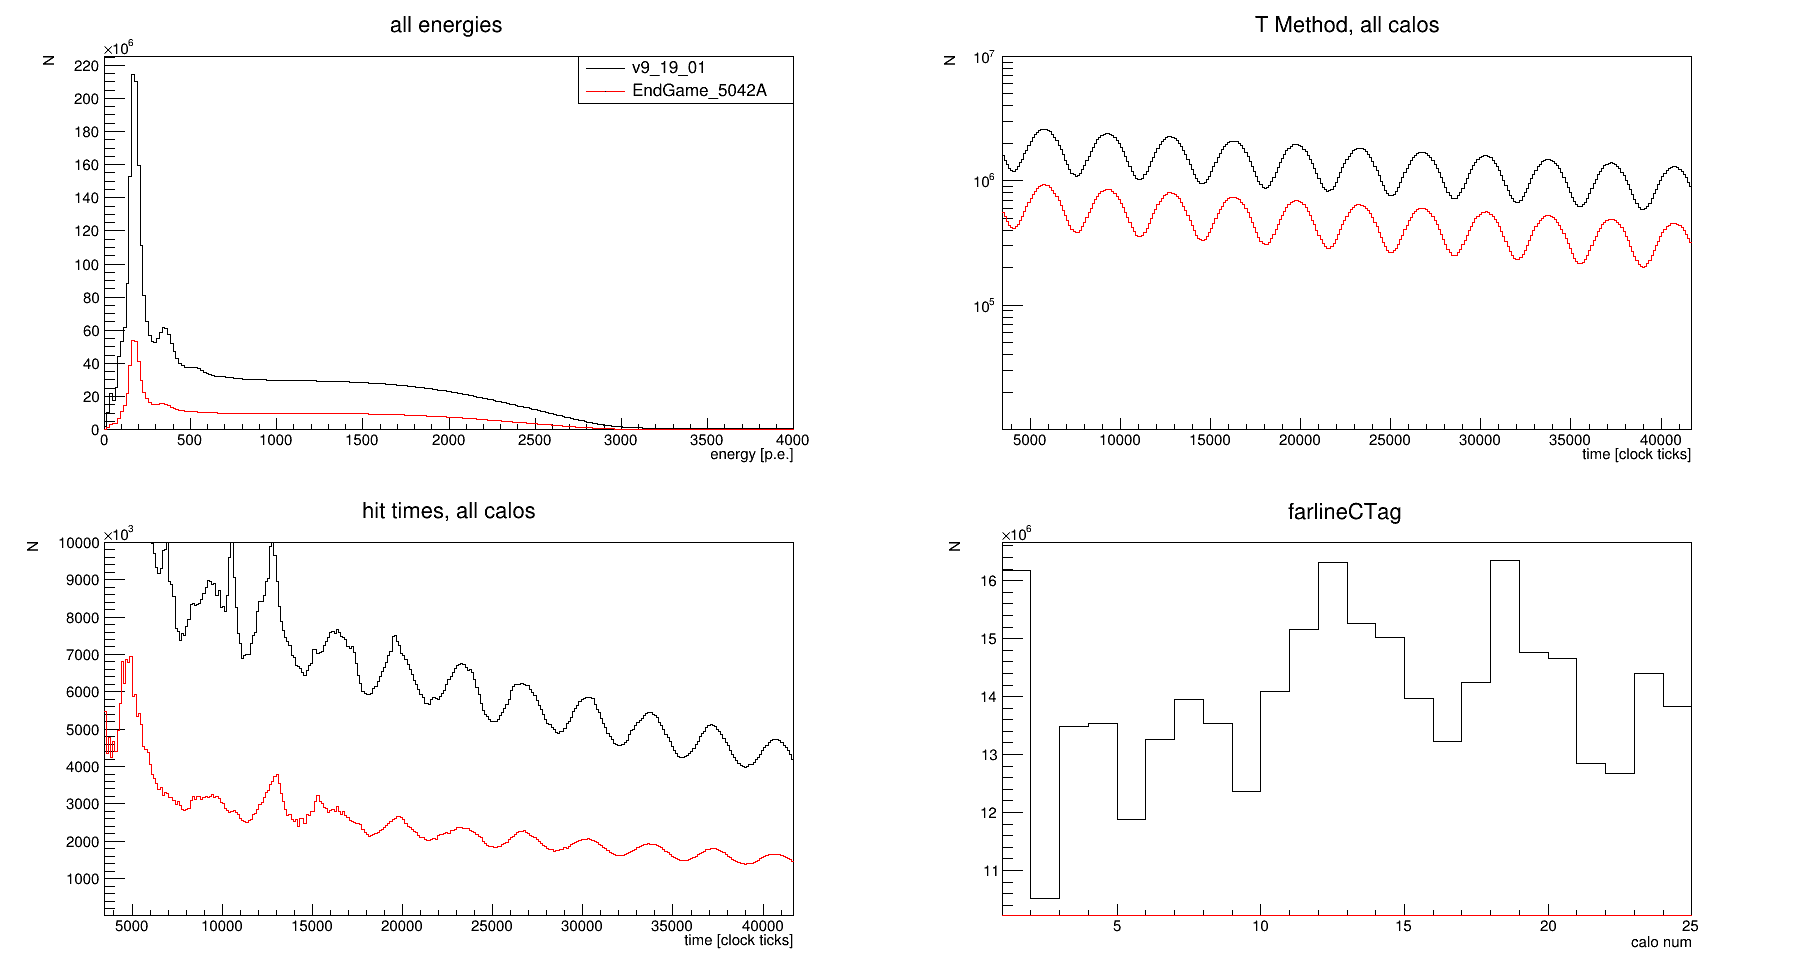

In [8]:
n = len(versionPaths)
c = r.TCanvas("cNew","cNew",1800,1000)
c.Divide(2,2)

c.cd(1)
leg = r.TLegend(0.65,0.8,0.9,0.9)
for version in range(n):
    histVec[version*4+0].SetLineColor(version+1)
    if(version<0.9):
        histVec[version*4+0].Draw()
    else:
        histVec[version*4+0].Draw("SAME")
    leg.AddEntry(histVec[version*4+0],versionNumbers[version],"pl")
    print(versionNumbers[version])
leg.Draw()

c.cd(2)
r.gPad.SetLogy()
for version in range(n):
    histVec[version*4+1].SetLineColor(version+1)
    if(version<0.9):
        histVec[version*4+1].Draw()
        histVec[version*4+1].GetYaxis().SetRangeUser(10000,10000000)
    else:
        histVec[version*4+1].Draw("SAME")

c.cd(3)
for version in range(n):
    histVec[version*4+2].SetLineColor(version+1)
    if(version<0.9):
        histVec[version*4+2].Draw()
        histVec[version*4+2].GetYaxis().SetRangeUser(10000,10000000)
    else:
        histVec[version*4+2].Draw("SAME")

c.cd(4)
for version in range(n):
    histVec[version*4+3].SetLineColor(version+1)
    if(version<0.9):
        histVec[version*4+3].Draw()
    else:
        histVec[version*4+3].Draw("SAME")
    
    
c.Draw()

Now let's compare the 5 parameter fits for all of the calos

./images/v9_19_01/
[<ROOT.TKey object ("c") at 0x7ffff1c2b550>]
[<ROOT.TFrame object ("TFrame") at 0x7ffff1dfbcd0>, <ROOT.TH1D object ("allCaloWiggle") at 0x7ffff1e08b60>, <ROOT.TPaveText object ("title") at 0x7fffed7da330>, <ROOT.TPad object ("upper_pad") at 0x7fffed7da6e0>, <ROOT.TPad object ("lower_pad") at 0x7fffed7d8b80>, <ROOT.TPad object ("top_pad") at 0x7fffed6dded0>, <ROOT.TRatioPlot object ("TRatioPlot") at 0x7fffed7d1bf0>]
./images/EndGame_5042A/
[<ROOT.TKey object ("c") at 0x7ffff1e4f7b0>]
[<ROOT.TFrame object ("TFrame") at 0x7ffff18b2b90>, <ROOT.TH1D object ("allCaloWiggle") at 0x7ffff1e4f9a0>, <ROOT.TPaveText object ("title") at 0x7ffff1e37230>, <ROOT.TPad object ("upper_pad") at 0x7ffff1e35bb0>, <ROOT.TPad object ("lower_pad") at 0x7ffff1e364f0>, <ROOT.TPad object ("top_pad") at 0x7ffff1c39b80>, <ROOT.TRatioPlot object ("TRatioPlot") at 0x7ffff1e34c70>]
[<ROOT.TH1D object ("allCaloWiggle") at 0x7ffff1e37720>, <ROOT.TH1D object ("allCaloWiggle") at 0x7ffff1e355d0>]
TFile*

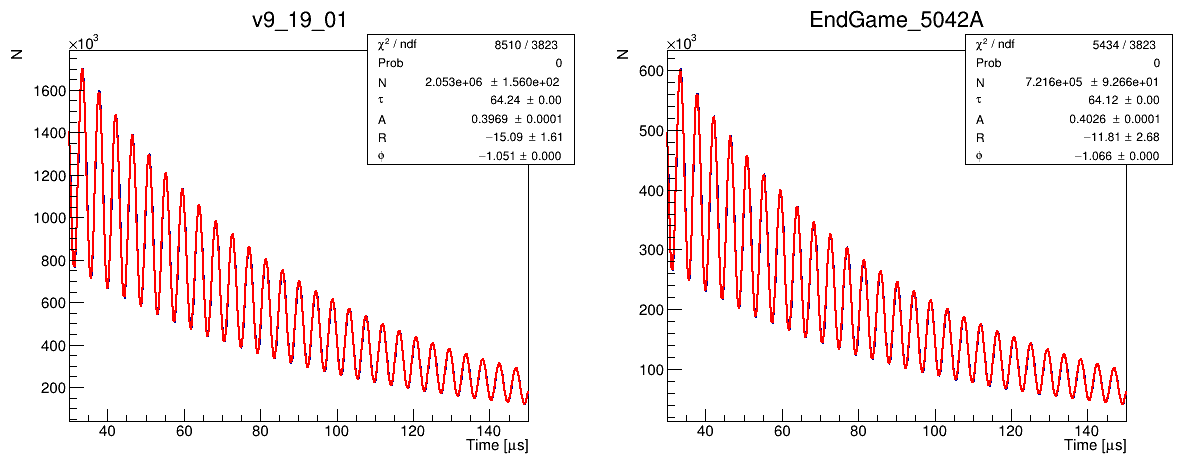

In [9]:
c4 = r.TCanvas("c4","c4",1200,500)
c4.Divide(int(len(versionPaths)),1)

histVec = []
for i, versionPath in enumerate(versionPaths):
    print(versionPath)
    f = r.TFile(versionPath+versionNumbers[i]+"_TmethodWiggleFitAllCalos.root")
    f.ls()
    keys = list(f.GetListOfKeys())
    print(keys)
    c = f.Get(keys[0].GetName())
    c.cd(0)
    prims = list(c.GetListOfPrimitives())
    print(prims)
    
    pad = prims[1].Clone()
    pad.SetDirectory(0)
    histVec.append(pad)
    
print(histVec)
    
for i in range(len(versionNumbers)):
    histVec[i].SetTitle(versionNumbers[i])
    c4.cd(i+1)
    histVec[i].Draw()
    
    
c4.Draw()

And the residuals

./images/v9_19_01/
[<ROOT.TKey object ("c1_n11") at 0x7ffff1e2b3f0>]
[<ROOT.TFrame object ("TFrame") at 0x7ffff1e1f2a0>, <ROOT.TH1D object ("out_MAG P") at 0x7ffff1ed76f0>, <ROOT.TPaveText object ("title") at 0x7ffff1e4e7a0>]
./images/EndGame_5042A/
[<ROOT.TKey object ("c1_n3") at 0x7ffff1ed5d40>]
[<ROOT.TFrame object ("TFrame") at 0x7ffff1e32020>, <ROOT.TH1D object ("out_MAG P") at 0x7ffff1f9ffe0>, <ROOT.TPaveText object ("title") at 0x7ffff1ed9c70>]
[<ROOT.TH1D object ("out_MAG P") at 0x7ffff1ed7b50>, <ROOT.TH1D object ("out_MAG P") at 0x7ffff1f9fa50>]
TFile**		./images/v9_19_01/v9_19_01_5ParamResiduals.root	
 TFile*		./images/v9_19_01/v9_19_01_5ParamResiduals.root	
  KEY: TCanvas	c1_n11;1	c1_n11
TFile**		./images/EndGame_5042A/EndGame_5042A_5ParamResiduals.root	
 TFile*		./images/EndGame_5042A/EndGame_5042A_5ParamResiduals.root	
  KEY: TCanvas	c1_n3;1	c1_n3


Warning in <TCanvas::Constructor>: Deleting canvas with same name: c4
Info in <TCanvas::SaveAs>: ROOT file hi.root has been created


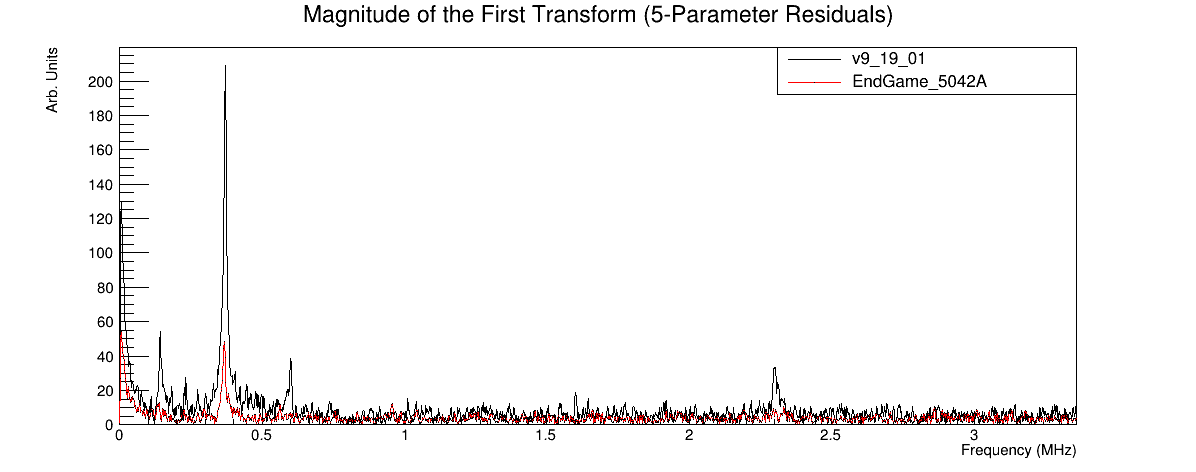

In [10]:
histVec = []
for i, versionPath in enumerate(versionPaths):
    print(versionPath)
    f = r.TFile(versionPath+versionNumbers[i]+"_5ParamResiduals.root")
    f.ls()
    keys = list(f.GetListOfKeys())
    print(keys)
    c = f.Get(keys[0].GetName())
    c.cd(0)
    prims = list(c.GetListOfPrimitives())
    print(prims)
    
    hist = prims[1].Clone()
    hist.SetDirectory(0)
    histVec.append(hist)
   

c4 = r.TCanvas("c4","c4",1200,500)
leg = r.TLegend(0.65,0.8,0.9,0.9)
print(histVec)
for i, hist in enumerate(histVec):
    
    hist.SetLineColor(i+1)
    
    if i < 0.5:
        hist.Draw("HIST P0 L")
    else:
        hist.Draw("HIST P0 L SAME")
    leg.AddEntry(hist,versionNumbers[i],"pl")

leg.Draw()
#c4.SetLogy()
c4.Draw()
c4.Print("hi.root")

And now let's do the same for the 13-parameter fits

./images/v9_19_01/
[<ROOT.TKey object ("c3") at 0x7ffff1f95840>]
[<ROOT.TFrame object ("TFrame") at 0x7ffff1c39ea0>, <ROOT.TH1D object ("laserSyncEnergies") at 0x7ffff19abdb0>, <ROOT.TH1D object ("laserSyncEnergies") at 0x7ffff1e4ec80>, <ROOT.TH1D object ("laserSyncEnergies") at 0x7ffff1f92fa0>, <ROOT.TH1D object ("laserSyncEnergies") at 0x7ffff1c3acf0>, <ROOT.TH1D object ("laserSyncEnergies") at 0x7ffff1f94860>, <ROOT.TH1D object ("laserSyncEnergies") at 0x7ffff1e4d6d0>, <ROOT.TH1D object ("laserSyncEnergies") at 0x7ffff20de370>, <ROOT.TH1D object ("laserSyncEnergies") at 0x7ffff20de7d0>, <ROOT.TH1D object ("laserSyncEnergies") at 0x7ffff20eb120>, <ROOT.TH1D object ("laserSyncEnergies") at 0x7ffff20eb580>, <ROOT.TH1D object ("laserSyncEnergies") at 0x7ffff19a9ff0>, <ROOT.TH1D object ("laserSyncEnergies") at 0x7ffff19aa450>, <ROOT.TH1D object ("laserSyncEnergies") at 0x7ffff19aa8e0>, <ROOT.TH1D object ("laserSyncEnergies") at 0x7ffff1e287a0>, <ROOT.TH1D object ("laserSyncEnergies") at 

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c4


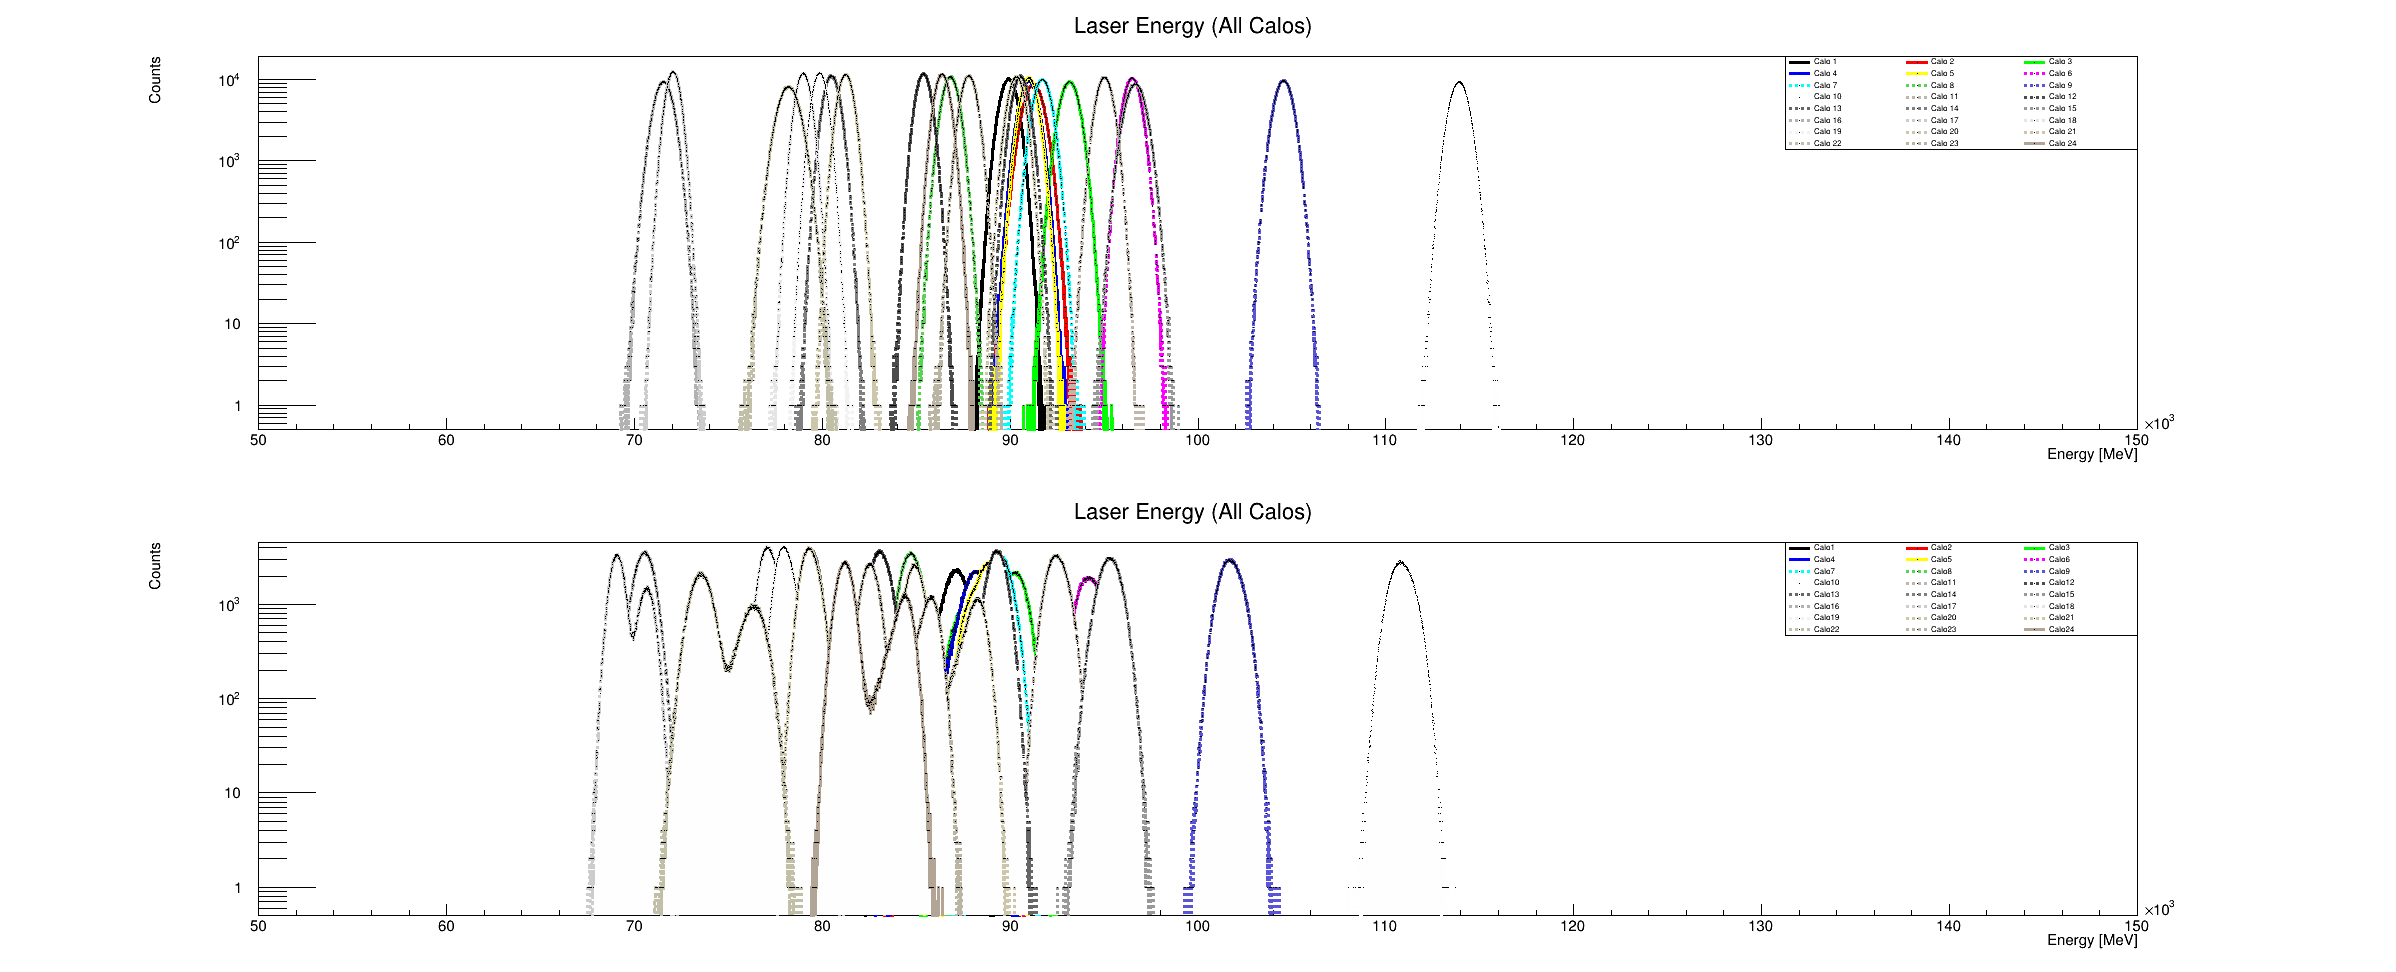

In [11]:
histVec = []
for i, versionPath in enumerate(versionPaths):
    print(versionPath)
    f = r.TFile(versionPath+versionNumbers[i]+"_laserEnergyPulse_allcalo.root")
    f.ls()
    keys = list(f.GetListOfKeys())
    print(keys)
    c = f.Get(keys[0].GetName())
    c.cd(0)
    prims = list(c.GetListOfPrimitives())
    print(prims)
    
    for x in prims:
        if(str(type(x)) == "<class 'ROOT.TH1D'>"):
            hist = x.Clone()
            hist.SetDirectory(0)
            histVec.append(hist)
   

c4 = r.TCanvas("c4","c4",2400,1000)
c4.Divide(1,2)
c4.cd(0)
leg = r.TLegend(0.75,0.7,0.9,0.9)
leg.SetNColumns(3)
c4.cd(2)
leg2 = r.TLegend(0.75,0.7,0.9,0.9)
leg2.SetNColumns(3)

print(histVec)
for i, hist in enumerate(histVec):
    
    if i < 24:
        c4.cd(1)
        r.gPad.SetLogy()
        hist.SetLineColor(i+1)
    else:
        c4.cd(2)
        r.gPad.SetLogy()
        hist.SetLineColor((i-24)+1)
    
    if i < 0.5:
        hist.Draw("HIST P0 L")
    else:
        hist.Draw("HIST P0 L SAME")
    if i < 24:
        leg.AddEntry(hist,"Calo "+str(i+1),"pl")
    else:
        leg2.AddEntry(hist,"Calo"+str(i-24+1),"pl")

c4.cd(1)     
leg.Draw()
c4.cd(2)
leg2.Draw()
c4.Draw()

TFile**		./images/v9_19_01/v9_19_01_laserEnergyPulse_allcalo.root	
 TFile*		./images/v9_19_01/v9_19_01_laserEnergyPulse_allcalo.root	
  KEY: TCanvas	c3;1	c3
TFile**		./images/EndGame_5042A/EndGame_5042A_laserEnergyPulse_allcalo.root	
 TFile*		./images/EndGame_5042A/EndGame_5042A_laserEnergyPulse_allcalo.root	
  KEY: TCanvas	c3;1	c3


Warning in <TCanvas::Constructor>: Deleting canvas with same name: c4


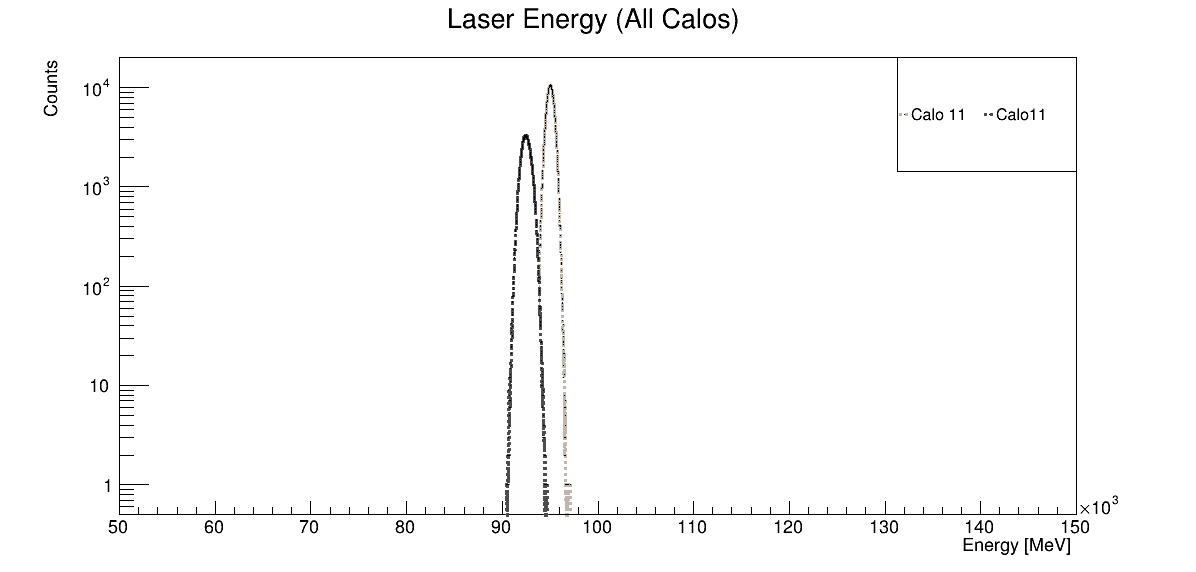

In [12]:
histVec = []
for i, versionPath in enumerate(versionPaths):
    #print(versionPath)
    f = r.TFile(versionPath+versionNumbers[i]+"_laserEnergyPulse_allcalo.root")
    f.ls()
    keys = list(f.GetListOfKeys())
    #print(keys)
    c = f.Get(keys[0].GetName())
    c.cd(0)
    prims = list(c.GetListOfPrimitives())
    #print(prims)
    
    for x in prims:
        if(str(type(x)) == "<class 'ROOT.TH1D'>"):
            hist = x.Clone()
            hist.SetDirectory(0)
            histVec.append(hist)
   

caloNum = 11

c4 = r.TCanvas("c4","c4",1200,600)
c4.cd(0)
leg = r.TLegend(0.75,0.7,0.9,0.9)
leg.SetNColumns(3)
c4.cd(2)
leg2 = r.TLegend(0.75,0.7,0.9,0.9)
leg2.SetNColumns(3)

#print(histVec)
for i, hist in enumerate(histVec):
    if( (i+1) % 24 != caloNum ):
        continue
    
    if i < 24:
        r.gPad.SetLogy()
        hist.SetLineColor(i+1)
    else:
        r.gPad.SetLogy()
        hist.SetLineColor((i-24)+2)
    
    if i < 0.5:
        hist.Draw("HIST P0 L")
    else:
        hist.Draw("HIST P0 L SAME")
    if i < 24:
        leg.AddEntry(hist,"Calo "+str(i+1),"pl")
    else:
        leg.AddEntry(hist,"Calo"+str(i-24+1),"pl")

c4.cd(1)     
leg.Draw()
c4.cd(2)
c4.Draw()

./images/v9_19_01/
[<ROOT.TKey object ("c3") at 0x7ffff1fe12e0>]
[<ROOT.TFrame object ("TFrame") at 0x7ffff0637110>, <ROOT.TH1D object ("laserSyncEnergies") at 0x7ffff1fe0670>, <ROOT.TH1D object ("laserSyncEnergies") at 0x7ffff2a425d0>, <ROOT.TH1D object ("laserSyncEnergies") at 0x7ffff2a42a30>, <ROOT.TH1D object ("laserSyncEnergies") at 0x7ffff20e4d90>, <ROOT.TH1D object ("laserSyncEnergies") at 0x7ffff20e5220>, <ROOT.TH1D object ("laserSyncEnergies") at 0x7ffff22d99e0>, <ROOT.TH1D object ("laserSyncEnergies") at 0x7ffff22d9ea0>, <ROOT.TH1D object ("laserSyncEnergies") at 0x7ffff2106060>, <ROOT.TH1D object ("laserSyncEnergies") at 0x7ffff2106520>, <ROOT.TH1D object ("laserSyncEnergies") at 0x7ffff2a4d330>, <ROOT.TH1D object ("laserSyncEnergies") at 0x7ffff2a4d7f0>, <ROOT.TH1D object ("laserSyncEnergies") at 0x7ffff2a4dcb0>, <ROOT.TH1D object ("laserSyncEnergies") at 0x7ffff22e35b0>, <ROOT.TH1D object ("laserSyncEnergies") at 0x7ffff22e3a70>, <ROOT.TH1D object ("laserSyncEnergies") at 

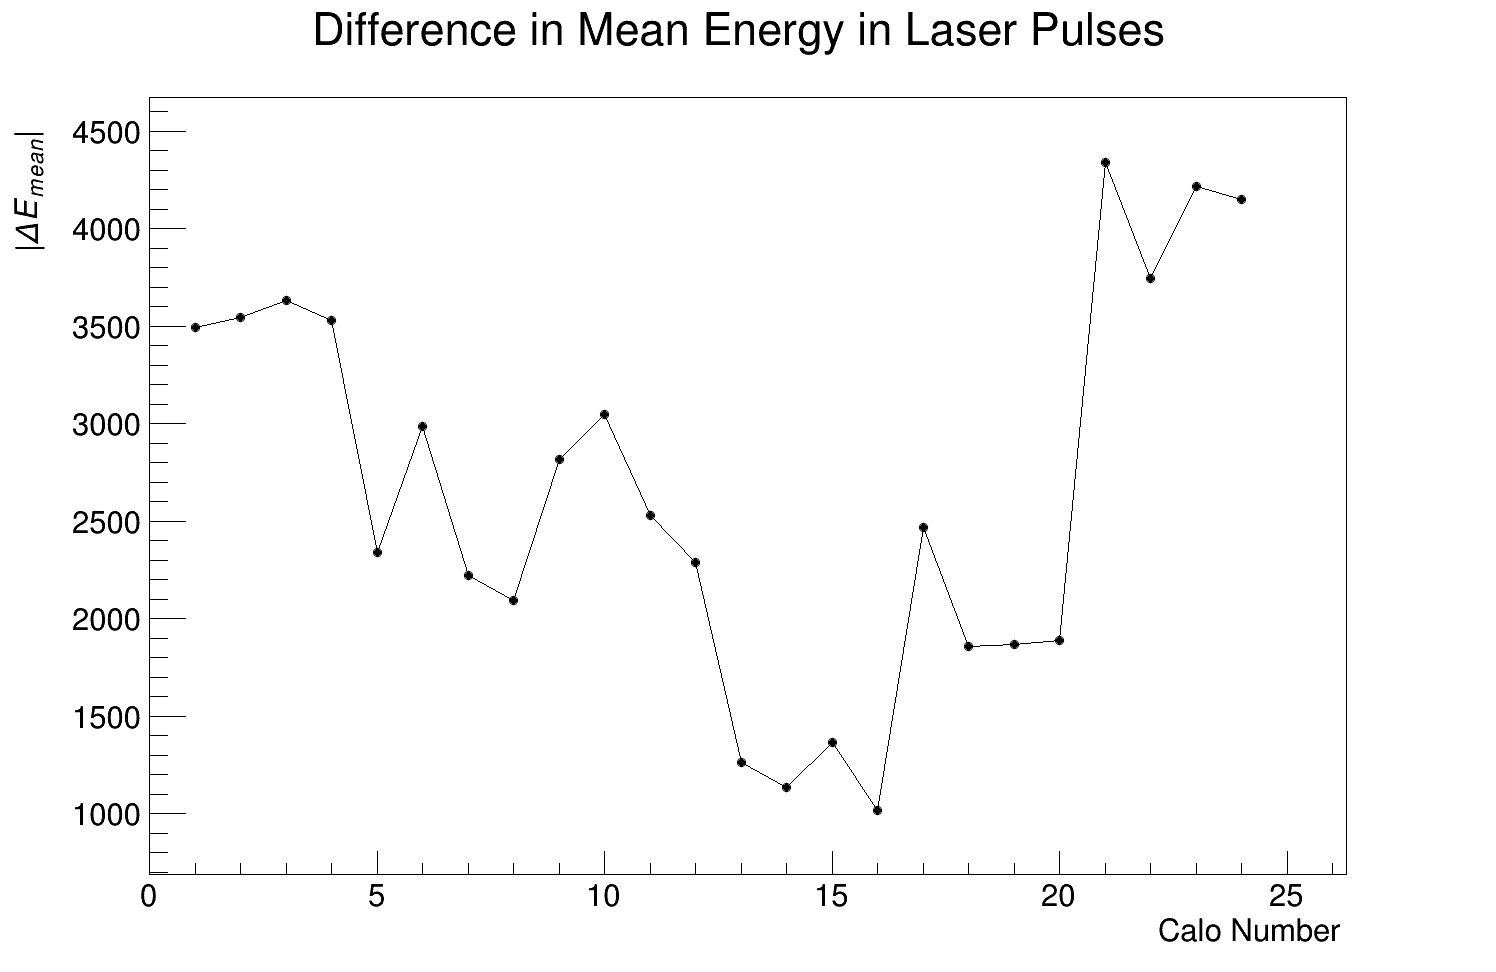

In [13]:
histVec = []
for i, versionPath in enumerate(versionPaths):
    print(versionPath)
    f = r.TFile(versionPath+versionNumbers[i]+"_laserEnergyPulse_allcalo.root")
    f.ls()
    keys = list(f.GetListOfKeys())
    print(keys)
    c = f.Get(keys[0].GetName())
    c.cd(0)
    prims = list(c.GetListOfPrimitives())
    print(prims)
    
    for x in prims:
        if(str(type(x)) == "<class 'ROOT.TH1D'>"):
            hist = x.Clone()
            hist.SetDirectory(0)
            histVec.append(hist)
   

c5 = r.TCanvas("c5","c5",1500,1000)
leg = r.TLegend(0.75,0.7,0.9,0.9)
leg.SetNColumns(3)

print(histVec)

gr = r.TGraph()

for i in range(len(histVec)):
    if(i == 24):
        break
    h1 = histVec[i].Clone()
    h2 = histVec[i+24].Clone()
    
    diffMean = r.TMath.Abs(h1.GetMean() - h2.GetMean())
    
    gr.SetPoint(i, i+1, diffMean)
    
gr.SetTitle("Difference in Mean Energy in Laser Pulses")
gr.GetXaxis().SetTitle("Calo Number")
gr.GetYaxis().SetTitle("$ | \Delta E_{mean} | $")
gr.SetMarkerStyle(8)
gr.Draw("apl")
c5.Draw()

./images/v9_19_01/
[<ROOT.TKey object ("c3") at 0x7ffff202b8f0>]
[<ROOT.TFrame object ("TFrame") at 0x7ffff1e35420>, <ROOT.TH1D object ("laserSyncEnergies") at 0x7ffff2e02900>, <ROOT.TH1D object ("laserSyncEnergies") at 0x7ffff30430e0>, <ROOT.TH1D object ("laserSyncEnergies") at 0x7ffff30434d0>, <ROOT.TH1D object ("laserSyncEnergies") at 0x7ffff3665810>, <ROOT.TH1D object ("laserSyncEnergies") at 0x7ffff3665c70>, <ROOT.TH1D object ("laserSyncEnergies") at 0x7ffff3078980>, <ROOT.TH1D object ("laserSyncEnergies") at 0x7ffff3078de0>, <ROOT.TH1D object ("laserSyncEnergies") at 0x7ffff3013ec0>, <ROOT.TH1D object ("laserSyncEnergies") at 0x7ffff3014320>, <ROOT.TH1D object ("laserSyncEnergies") at 0x7ffff3014780>, <ROOT.TH1D object ("laserSyncEnergies") at 0x7ffff20debc0>, <ROOT.TH1D object ("laserSyncEnergies") at 0x7ffff20df020>, <ROOT.TH1D object ("laserSyncEnergies") at 0x7ffff20df4e0>, <ROOT.TH1D object ("laserSyncEnergies") at 0x7ffff200e030>, <ROOT.TH1D object ("laserSyncEnergies") at 

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c5


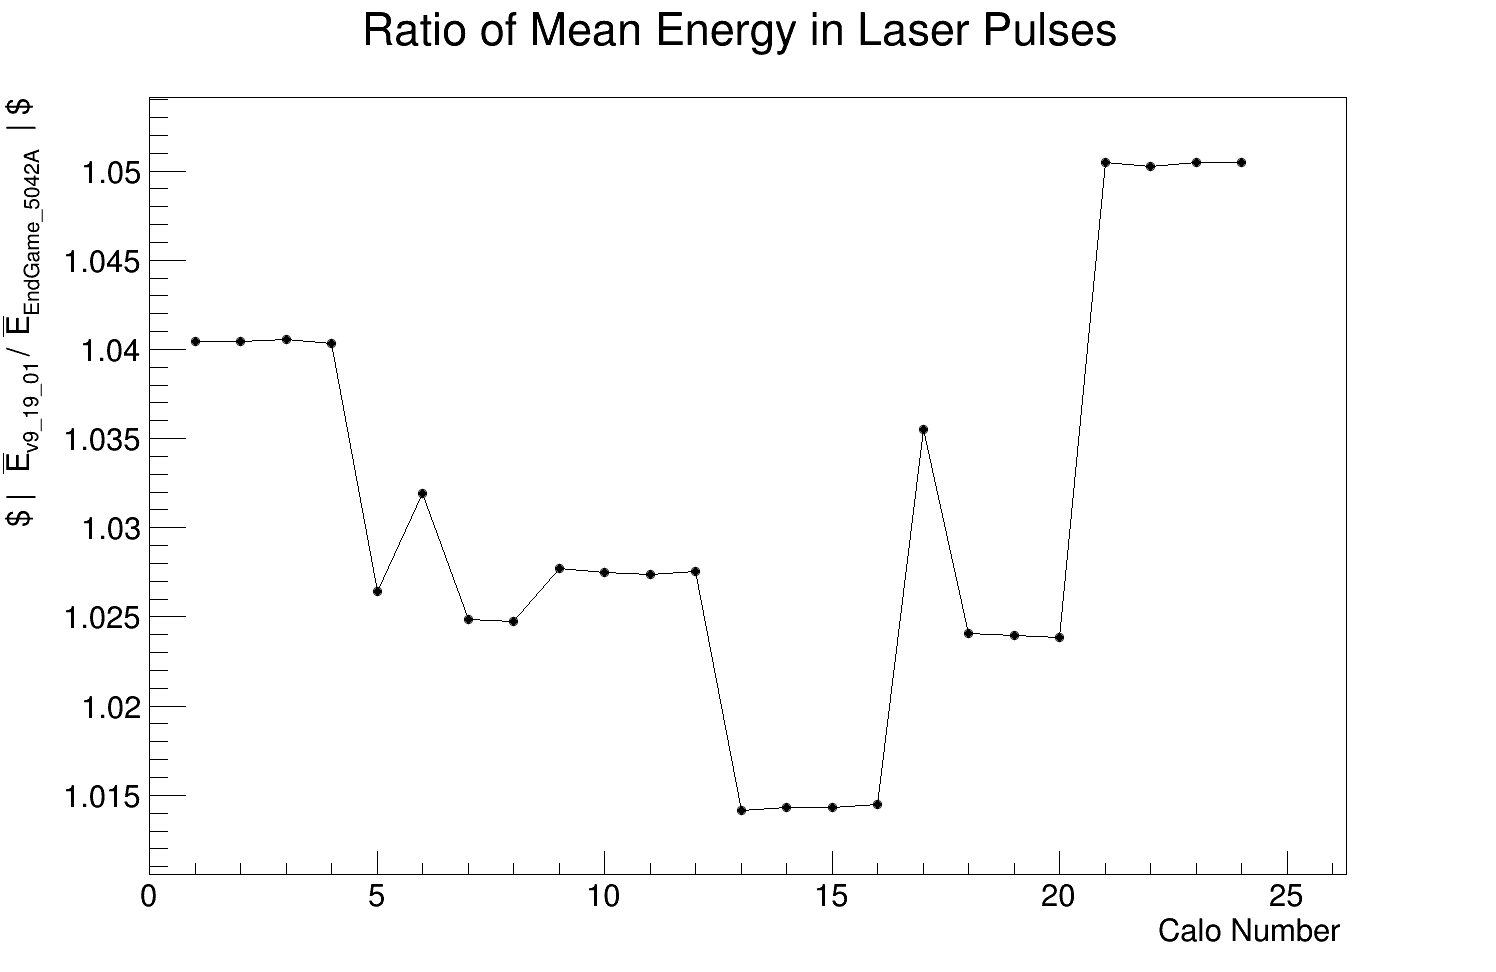

In [14]:
histVec = []
for i, versionPath in enumerate(versionPaths):
    print(versionPath)
    f = r.TFile(versionPath+versionNumbers[i]+"_laserEnergyPulse_allcalo.root")
    f.ls()
    keys = list(f.GetListOfKeys())
    print(keys)
    c = f.Get(keys[0].GetName())
    c.cd(0)
    prims = list(c.GetListOfPrimitives())
    print(prims)
    
    for x in prims:
        if(str(type(x)) == "<class 'ROOT.TH1D'>"):
            hist = x.Clone()
            hist.SetDirectory(0)
            histVec.append(hist)
   

c5 = r.TCanvas("c5","c5",1500,1000)
leg = r.TLegend(0.75,0.7,0.9,0.9)
leg.SetNColumns(3)

print(histVec)

gr = r.TGraph()

for i in range(len(histVec)):
    if(i == 24):
        break
    h1 = histVec[i].Clone()
    h2 = histVec[i+24].Clone()
    
    diffMean = r.TMath.Abs(h1.GetMean() / h2.GetMean())
    
    gr.SetPoint(i, i+1, diffMean)
    
gr.SetTitle("Ratio of Mean Energy in Laser Pulses")
gr.GetXaxis().SetTitle("Calo Number")
gr.GetYaxis().SetTitle("$ |  #bar{E}_{"+versionNumbers[0]+"} / #bar{E}_{"+versionNumbers[1]+"}  | $")
gr.SetMarkerStyle(8)
gr.Draw("apl")

#gr.GetYaxis().SetRangeUser(0.75,1.25)

c5.Draw()

In [ ]:
---